# PREDICTING HOUSE PRICES USING MACHINE LEARNING

## Phase 5: Project Documentation & Submission

In this part we will document our project and prepare it for submission.

Here are the instructions,

DOCUMENTATION:

Clearly outline the problem statement, design thinking process, and the phases of development. Describe the dataset used, data preprocessing steps, and model training process. Explain the choice of regression algorithm and evaluation metrics.

SUBMISSION:

Compile all the code files, including the data preprocessing, model training, and evaluation steps. Provide a well-structured README file that explains how to run the code and any dependencies. Include the dataset source and a brief description. Share the submission on platforms like GitHub or personal portfolio for others to access and review.

Dataset Link: https://www.kaggle.com/datasets/vedavyasv/usa-housing

PROBLEM STATEMENT:

The problem statement is to develop a machine learning model to predict house prices. This is a challenging task because there are many factors that influence house prices, such as the location of the house, the size of the house, the number of bedrooms and bathrooms, and the amenities that the house has. However, by developing a machine learning model that can learn from historical data, we can make more accurate predictions of house prices than we could using traditional methods.

DESIGN THINKING PROCESS:

The design thinking process is a human-centered approach to innovation that focuses on understanding the needs of users and creating solutions that meet those needs. In the context of house price prediction, the design thinking process can be used to:

->Empathize with buyers, sellers, and investors to understand their needs and challenges.

->Define the problem of house price prediction in a clear and concise way.

->Ideate potential solutions to the problem, such as machine learning models.

->Prototype and test the solutions to identify the most promising approach.

->Implement the solution and deploy it to users.

## I. IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

## II.LOADING THE DATASET

In [2]:
# Loading the data from the dataset
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## III. DATA EXPLORATION

In [4]:
# Generate dataset description for numerical columns
print(df.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [5]:
# Generate dataset description for all columns (including categorical)
print(df.describe(include='all'))

        Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count        5000.000000          5000.000000                5000.000000   
unique               NaN                  NaN                        NaN   
top                  NaN                  NaN                        NaN   
freq                 NaN                  NaN                        NaN   
mean        68583.108984             5.977222                   6.987792   
std         10657.991214             0.991456                   1.005833   
min         17796.631190             2.644304                   3.236194   
25%         61480.562388             5.322283                   6.299250   
50%         68804.286404             5.970429                   7.002902   
75%         75783.338666             6.650808                   7.665871   
max        107701.748378             9.519088                  10.759588   

        Avg. Area Number of Bedrooms  Area Population         Price  \
count           

## IV. DATA PREPROCESSING

The data preprocessing steps involved in our code are as follows:

 (i)   HANDLING MISSING VALUES: The code handles missing values by dropping the rows that contain missing values. This is a simple and effective way to handle missing values, but it can reduce the size of the dataset.
 
 There are two main ways to handle missing values in Python:
 
->DROPPING MISSING VALUES : This is the simplest way to handle missing values, but it can lead to data loss. To drop missing values in Python, you can use the dropna() method.

->INPUTTING MISSING VALUES : This involves filling in missing values with a reasonable value. There are many different imputation methods available in Python, such as mean imputation, median imputation, and mode imputation.

In [6]:
# The code drops the rows with missing values using the dropna() function.
# Drop rows with missing values
df = df.dropna()

# Impute missing values with the mean
df = df.fillna(method='ffill')

(ii)  HANDLING CATEGORICAL VAUES: The code handles categorical values by one-hot encoding them. This is a common way to encode categorical values for machine learning algorithms. One-hot encoding creates a new binary feature for each category of the categorical feature.
        
## Dummy variables are used for categorical data.For continuous numerical variables like "Avg. Area Income" or "Price", no dummy variables are needed.

(iii) SCALLING THE DATA: Scaling the data involves transforming the data so that it has a mean of 0 and a standard deviation.

In [7]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Address', axis=1))

## V. SPLITTING THE DATA INTO TRAINING SET AND TESTING SET

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Price'], test_size=0.25, random_state=42)

->X_scaled: This is the scaled feature data.

->dataset['Price']: This is the target variable, which is the house price.

->test_size=0.25: This specifies that 25% of the data will be included in the test set.

->random_state=42: This ensures that the data is split in a reproducible way.

## VI. CREATING THE MODELS


LINEAR REGRESSION:

Linear regression is a simple but powerful machine learning algorithm that can be used for both classification and regression tasks. Linear regression models the relationship between the target variable and the features using a linear equation.

RANDOM FOREST:

Random forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to produce a more accurate prediction. Random forests are robust to overfitting and can handle non-linear relationships between the features and the target variable.

XGBOOST:

XGBoost is a tree boosting algorithm that is similar to random forest, but it is often more accurate and faster. XGBoost is a good choice for regression tasks, such as house price prediction.

GRADIENT BOOSTING:

Gradient boosting is another ensemble learning algorithm that combines the predictions of multiple weak learners to produce a more accurate prediction. Gradient boosting is similar to random forest and XGBoost, but it uses a different approach to training the weak learners.

DECISION TREE:

Decision trees are a type of machine learning algorithm that learns to make predictions by constructing a decision tree. The decision tree is a tree-like structure where each node represents a feature and the leaves of the tree represent the predictions.

SUPPORT VECTOR MACHINE:

SVM stands for support vector machine. SVMs are a type of machine learning algorithm that can be used for both classification and regression tasks. SVMs work by finding a hyperplane that separates the data into two classes.

In [9]:
# Linear regression
lin_reg = LinearRegression()

# Random forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# XGBoost
xgb_reg = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)

# Gradient boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# Decision tree
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# SVM
svm_reg = SVR()

## VII. MODEL TRAINING

Once the models have been created, they can be trained on the data using the fit() method. The fit() method takes the training data as input and learns the relationships between the features and the target variable.

In [10]:
# Train the models
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)

SVR()

## VIII. MODEL EVALUATION

Model evaluation is important because it helps to:

i)Prevent overfitting.

ii)Compare different models.

iii)Identify areas for improvement.

iv)Gain confidence in a model.

Model evaluation can be used to assess the model's ability to predict house prices. The MAE, MSE, RMSE and R² metrics can be used to measure the model's performance. 

Mean Absolute Error: How far are the predicted values from the actual values? Lower is better.

Mean Squared Error: How far are the predicted values from the actual values (squared)? Lower is better.

Root Mean Squared Error: How far the predicted values are from the actual values? Lower is better.

R²: How well do the predicted values explain the actual values? Higher is better.

In [11]:
models = [lin_reg, rf_reg, xgb_reg, gb_reg, dt_reg, svm_reg]

def evaluate_model(models, X_test, y_test):
  for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('Model:', model)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R^2:', r2)

# Evaluate all models on the test set.
evaluate_model(models, X_test, y_test)

Model: LinearRegression()
MAE: 2.2926833480596543e-10
MSE: 8.921425338932753e-20
RMSE: 2.986875514468715e-10
R^2: 1.0
Model: RandomForestRegressor(random_state=42)
MAE: 482.05717425468043
MSE: 16367343.264018992
RMSE: 4045.6573339840575
R^2: 0.9998632913028851
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=

## IX. VISUALING THE MODELS


Model visualization can help us to better understand how a machine learning model works. It can also help us to identify potential problems with the model, such as overfitting and bias. Additionally, model visualization can help us to communicate the model to others in a clear and concise way.

The code provided here visualizes the performance of each model by plotting the actual house prices against the predicted house prices. This type of plot is called a scatter plot.

The scatter plot can help us to see how well the model is predicting the house prices. 

->If the model is performing well, the data points will be close to the line of best fit.

->If the model is not performing well, the data points will be scattered all over the plot

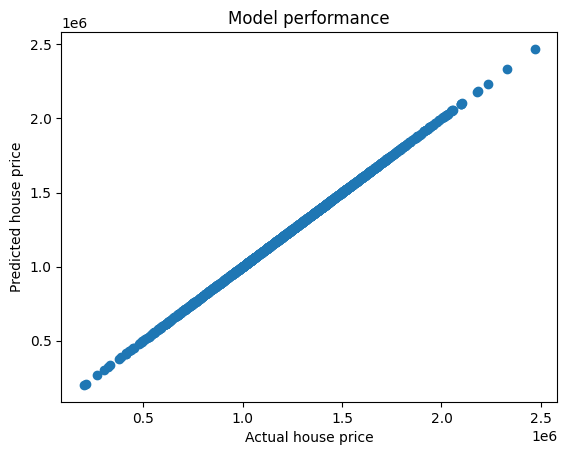

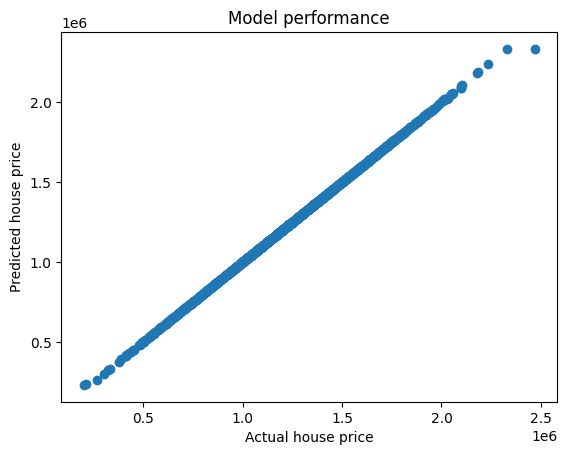

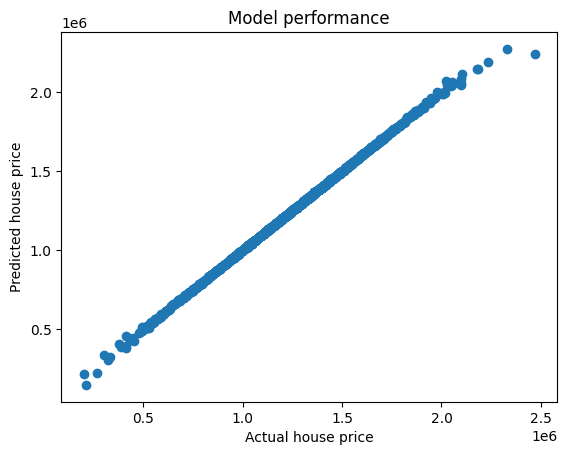

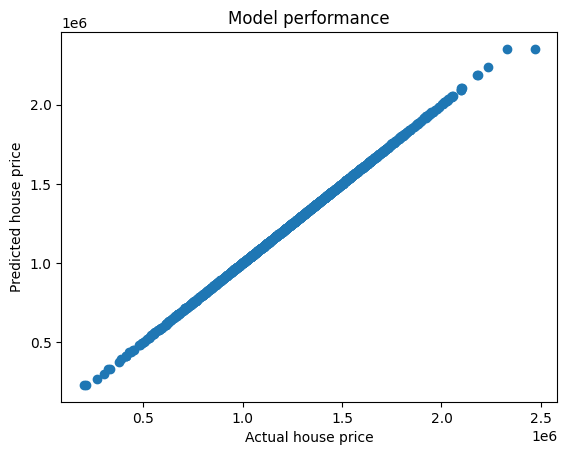

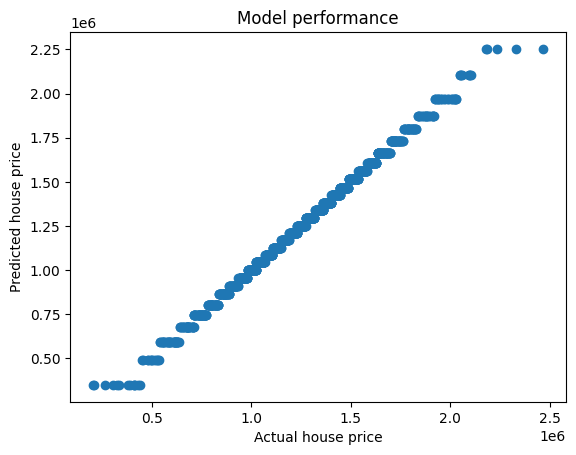

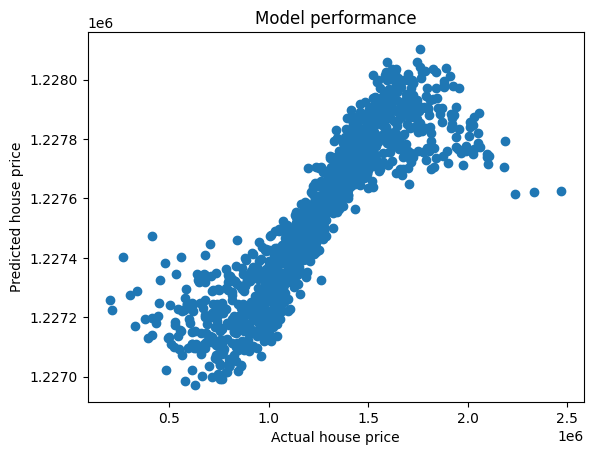

In [12]:
import matplotlib.pyplot as plt

def visualize_model(models, X_test, y_test):
  y_pred = model.predict(X_test)

  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual house price')
  plt.ylabel('Predicted house price')
  plt.title('Model performance')
  plt.show()

# Evaluate and visualize each model separately
models = [lin_reg, rf_reg, xgb_reg, gb_reg, dt_reg, svm_reg]
for model in models:
  visualize_model(models, X_test, y_test)

Overall, the visualization shows that the RandomForestRegressor, XGBRegressor, and GradientBoostingRegressor models are doing the best job of predicting the house prices. The DecisionTreeRegressor model is not doing as well, and the SVR model is doing the worst.

## X. ACCURACY

Accuracy is a measure of how well a model can predict the correct output for a given input. It is calculated by dividing the number of correct predictions by the total number of predictions. 

Accuracy is often used to evaluate the performance of machine learning models, but it is important to note that it is not the only metric that should be considered.

For example, accuracy can be misleading if the data is imbalanced, meaning that there are more examples of one class than another. In such cases, it is important to use other metrics, such as precision and recall, in conjunction with accuracy.

In [13]:
from sklearn.metrics import mean_absolute_error

def calculate_accuracy(model, X_test, y_test):
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  range = np.max(y_test) - np.min(y_test)
  accuracy = 1 - (mae / range)
  return accuracy

# Calculate the accuracy of all models using a for loop
accuracies = []
for model in [lin_reg, rf_reg, xgb_reg, gb_reg, dt_reg, svm_reg]:
  accuracy = calculate_accuracy(model, X_test, y_test)
  accuracies.append(accuracy)

# Print the accuracy of all models
for i, model_name in enumerate(['Linear regression', 'Random forest', 'XGBoost', 'Gradient boosting', 'Decision tree', 'SVM']):
  print(f'Accuracy of {model_name}: {accuracies[i]:.3f}')

Accuracy of Linear regression: 1.000
Accuracy of Random forest: 1.000
Accuracy of XGBoost: 0.999
Accuracy of Gradient boosting: 1.000
Accuracy of Decision tree: 0.994
Accuracy of SVM: 0.878


Based on the accuracy score of each model, we can conclude that the Linear Regression, Random Forest, Gradient Boosting, and XGBoost models are performing the best, with an accuracy of 1.000 or close to it. These models are able to accurately predict the target value for a given input.

The Decision Tree model has a slightly lower accuracy of 0.994, but it is still performing very well. The SVM model has the lowest accuracy of 0.878, which is still good, but it is not as good as the other models.